<a href="https://colab.research.google.com/github/jenniferarzu/nyu-python-public-policy/blob/master/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 7: Final Assignment**


**Problem Statement:**
311 data is an incredible resource, but one major concern with 311 complaints is that there can be bias in the data. The fact that one community district has a higher number of 311 noise complaints, doesn't necessarily mean it is actually louder than another community district. It simply means more people submitted 311 complaints. Some neighborhoods may have residents that are more likely to submit complaints than others for various reasons (ex: different expectations, more awareness about 311, more free time, more sense of empowerment or hope that the complaint will be resolved, etc). This makes it difficult to get a clear picture of conditions across the city, and it can help to compare datasets against each other.

Community District Profiles is an application that provides objective statistics about community districts. In this assignment, you will chose an indicator published on Community District Profiles and compare it against 311 complaint data.

Some ideas for inspiration:

- How does the number of buildings in the floodplain correlate with the number of 311 flooding complaints?
- How does the street cleanliness score correlate with 311 complaints about garbage and cleanliness?
- How does the percent of residents living in rent burden correlate with a number of 311 housing complaints (no heat/hot water or unsanitary conditions)?

**Note:** This is a more open ended assignment where you can dig into policy concerns that are of greatest interest to you. If the results of your analysis are inconclusive, that is okay, as long as you are using proper python coding techniques. You will be graded on approach and methodology, rather than the outcome of the analysis.

In [0]:
#importing packages and setting display options for dataframe
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm 

from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
#mounting drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#loading 311 data
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
indicator = pd.read_csv('https://planninglabs.carto.com/api/v2/sql?format=csv&q=SELECT%20cartodb_id,the_geom,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,lots_parking,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc%20FROM%20community_district_profiles&filename=indicators.csv', header='infer')

**Step 1.** Select an indicator from the Community District Profiles data that you want to analyze for this assignment. Create a dataframe that only captures the borocd and selected indicator column.

In [5]:
#quickly examining columns in dataset
indicator.head(2)

,the_geom,lots_parking,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,cartodb_id,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc
0,NaN,23,NaN,976.3,American Community Survey 2013-2017 5-Year Est...,American Community Survey (ACS) 2013-2017 5-ye...,2010 Census population counts for floodplain a...,1.5,101,man01@cb.nyc.gov,www1.nyc.gov/site/manhattancb1/index.page,Manhattan Community District 1,Manhattan CD 1,http://www1.nyc.gov/assets/planning/download/p...,1729,39547,7,1,28,22,1099,25961,96515,15.634252,15.7,11.8,1.1,2.4,4.2,7.3,6.6,4.7,3.5,2.9,1.8,2.2,2.3,2.5,2.3,1.7,1.0,0.7,1.1,2.6,1.78,678,0.284774,2164,121000.0,4900,0.041,0.220593,7599,0.644822,16733,0.353232,7367,19061,2.53,1036,0.284528,2913,118000.0,6272,0.042,0.241982,10238,0.61262,29221,0.350056,8750,28097,5.8,15.5,23.1,7865158,252207,4271043,1453796,5345624,433550,10274554,45535,1746495,185913,4107387,134060,343,78,578,25,11,1,69,33,167,65,1448,33,23,1.4,1.9,2.5,6.0,6.7,5.7,3.7,3.3,1.7,2.8,2.5,2.7,1.9,1.2,0.8,0.7,0.7,2.9,25.2,31.8,40.8,1.0,0.3,0.2,1.1,1.6,0.5,0.3,0.6,0.3,0.1,0.5,0.2,0.1,0.7,0.1,0.1,0.7,0.6,0.1,0.1,0.1,0.2,0.3,"Battery Park City, Civic Center, E

In [6]:
#creating dataframe with only borocd and poverty
povertydata = indicator[['poverty_rate', 'borocd']]
povertydata.head()

,poverty_rate,borocd
0,8.8,101
1,8.8,102
2,19.3,103
3,11.3,104
4,11.3,105



**Step 2.** Review the complaint types in the 311 complaint data. Choose the complaint type(s) you hypothesize should correlate with the indicator you chose in Step 2. Create a new dataframe that only captures the 311 complaints you want to analyze.

In [7]:
#lowercasing all complaint type categories
df['complaint_type'] = df.complaint_type.str.lower()

#checking to make sure values in complaint_type category are lowercase
df.complaint_type.head()

0             homeless person assistance
1                            door/window
2                    noise - residential
3                                  noise
4    request large bulky item collection
Name: complaint_type, dtype: object

In [8]:
#reviewing/examining complaint types in 311 data (grouping by complaint type and agency to see which agency responsible for the complaints and sorting complaints from highest to lowest)
df.groupby(['complaint_type','agency']).size().sort_values(ascending=False)

complaint_type                             agency
noise - residential                        NYPD      236350
heat/hot water                             HPD       205985
illegal parking                            NYPD      195159
request large bulky item collection        DSNY      177175
blocked driveway                           NYPD      145446
noise - street/sidewalk                    NYPD       95977
street condition                           DOT        93341
unsanitary condition                       HPD        87185
water system                               DEP        70509
noise                                      DEP        59007
paint/plaster                              HPD        53610
plumbing                                   HPD        49021
missed collection (all materials)          DSNY       46963
noise - commercial                         NYPD       45147
street light condition                     DOT        44835
noise - vehicle                            NYPD   

In [0]:
#creating new dataframe that only captures the 311 complaints of unsanitary condition and heat/hot water
complaints= df[(df.complaint_type=='unsanitary condition') | (df.complaint_type=='heat/hot water')] 

In [10]:
#checking new dataframe
complaints.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
15,15,15,39893543,08/01/2018 12:06:16 AM,08/03/2018 02:03:55 PM,HPD,Department of Housing Preservation and Develop...,heat/hot water,ENTIRE BUILDING,RESIDENTIAL BUILDING,11221,729 LAFAYETTE AVENUE,LAFAYETTE AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The complaint you filed is a duplicate of a co...,08/03/2018 02:03:55 PM,03 BROOKLYN,3.017860e+09,BROOKLYN,999790.0,190934.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.690733,-73.943964,"(40.69073285353906, -73.943963521266)",303.0
20,20,20,39899417,08/01/2018 12:07:22 AM,08/16/2018 09:58:39 AM,HPD,Department of Housing Preservation and Develop...,unsanitary condition,PESTS,RESIDENTIAL BUILDING,10457,1755 CLAY AVENUE,CLAY AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/16/2018 09:58:39 AM,05 BRONX,2.027990e+09,BRONX,1010591.0,247332.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.845505,-73.904795,"(40.84550502951069, -73.9047946370933)",205.0
52,52,52,39897573,08/01/2018 12:17:02 AM,08/13/2018 01:05:32 PM,HPD,Department of Housing Preservation and Develop...,heat/hot water,ENTIRE BUILDING,RESIDENTIAL BUILDING,11101,33-01 38 AVENUE,38 AVENUE,NaN,NaN,NaN,NaN,ADDRESS,Long Island City,NaN,NaN,Closed,NaN,The complaint you filed is a duplicate of a co...,08/13/2018 01:05:32 PM,01 QUEENS,4.003750e+09,QUEENS,1003545.0,213590.0,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.752911,-73.930358,"(40.752910688469996, -73.93035822987532)",401.0
74,74,74,39899020,08/01/2018 12:24:02 AM,08/03/2018 08:43:53 AM,HPD,Department of Housing Preservation and Develop...,heat/hot water,APARTMENT ONLY,RESIDENTIAL BUILDING,10011,419 WEST 21 STREET,WEST 21 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/03/2018 08:43:53 AM,04 MANHATTAN,1.007190e+09,MANHATTAN,983404.0,210900.0,ONLINE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.745548,-74.003053,"(40.745548328096355, -74.00305314436002)",104.0
94,94,94,39897846,08/01/2018 12:33:15 AM,08/08/2018 08:09:38 AM,HPD,Department of Housing Preservation and Develop...,unsanitary condition,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10304,79 OSGOOD AVENUE,OSGOOD AVENUE,NaN,NaN,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/08/2018 08:09:38 AM,01 STATEN ISLAND,5.005600e+09,STATEN ISLAND,961196.0,164759.0,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.618872,-74.083042,"(40.61887185441726, -74.08304210343434)",501.0


In [11]:
#checking new dataframe to make sure the only complaint types included are heat/hot water and unsanitary conditions
complaints.groupby('complaint_type').size().sort_values(ascending=False)

complaint_type
heat/hot water          205985
unsanitary condition     87186
dtype: int64

**Step 3.** Write out the hypothesis for your analysis. What relationship are you expecting to find between the variables and why?


The current analysis aims to examine: Does poverty rate correlate with the number of 311 heat/hot water and unsanitary conditions requests across community districts? 
- The hypothesis for this analysis is that community districts with higher  prevalence of poverty will have increased number of heat/hot water and unsanitary conditions requests. Community districts with higher proportion of poverty tend to have a greater number of low income housing, commmonly in substandard, not properly/adequately maintained conditions. Neglected maintenance of these housing units exposes residents to malfunctioning heating units and poor and unsanitary living conditions (mold, rodents, etc.,). As a result, I hypothesize that the greater the prevalence of poverty in a community district, the higher the likelihood that residents will inititate 311 requests about heat/hot water and unsanitary conditions. 

**Step 4.** Get the count of 311 complaints per community district (borocd) using the filtered dataframe you created in Step 2.


In [12]:
#count of 311 complaints (heat/hot water & unsanitary condition) community grouped by borocd
complaints_grouped = complaints.groupby(['borocd']).size().reset_index(name='count_of_311_complaints')
complaints_grouped.head()

,borocd,count_of_311_complaints
0,101.0,377
1,102.0,2157
2,103.0,4901
3,104.0,3046
4,105.0,967


**Step 5.** Join the indicator dataframe (from Step 1) with 311 counts dataframe (from Step 4) using the borocd value.

In [0]:
#merging indicator and 311 dataframes using an inner join 
merged_data = pd.merge(left=povertydata, right=complaints_grouped, left_on='borocd', right_on='borocd')

In [14]:
#quickly checking merged dataframe
merged_data.head()

,poverty_rate,borocd,count_of_311_complaints
0,8.8,101,377
1,8.8,102,2157
2,19.3,103,4901
3,11.3,104,3046
4,11.3,105,967


In [15]:
#checking to make sure only 59 borocds in dataframe
print(len(merged_data.borocd))

59


**Step 6.** Produce a scatter plot of the indicator values vs. 311 complaint counts. The should be one point per community district.

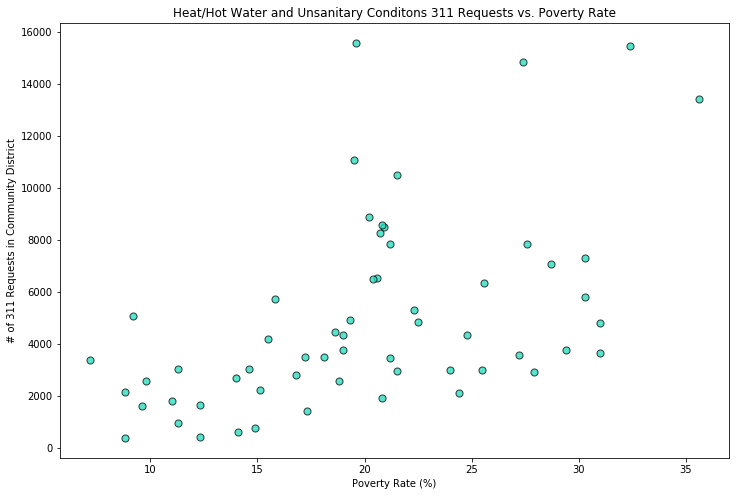

In [16]:
#defining x and y values for the scatter plot
x = np.array(merged_data.sort_values('borocd').poverty_rate)
y = np.array(merged_data.sort_values('borocd').count_of_311_complaints)

#creating scatter plot
plt.figure(figsize=(12, 8)) 
plt.scatter(x, y, s=50, c='#1fdbbc', edgecolors='black', alpha=0.75) 

#labeling the scatter plot
plt.title('Heat/Hot Water and Unsanitary Conditons 311 Requests vs. Poverty Rate')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('# of 311 Requests in Community District')
plt.show()


**Step 7.** Conduct an OLS linear regression using the indicator values vs. 311 complaint counts and interpret the results.

In [17]:
# defining y = dependent variable (# of 311 complaints)
y = np.array(merged_data.count_of_311_complaints)

# defining x = independent variable (poverty rate) with a constant added
x = np.array(merged_data.poverty_rate)
x = sm.add_constant(x)

#defining the linear regression model
model = sm.OLS(y, x).fit()

#printing out the OLS results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     20.88
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           2.67e-05
Time:                        21:43:39   Log-Likelihood:                -558.23
No. Observations:                  59   AIC:                             1120.
Df Residuals:                      57   BIC:                             1125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -578.5872   1282.045     -0.451      0.6

**Step 8.** Use the linear regression results to add a line of best fit to your scatterplot

In [21]:
#storing intercept and coefficient
p = model.params 
print('parameters:', p)

#storing R2
r2 = model.rsquared 
print('R2:', r2)

parameters: [-578.58716291  278.18754153]
R2: 0.2680843515220359


In [22]:
#defining line fit equation 
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = 278.19x + -578.59; R2 = 0.268


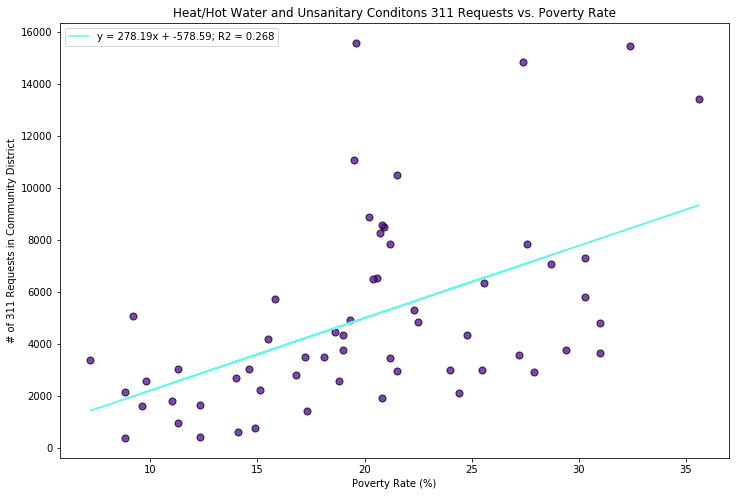

In [23]:
# create an array of x values for the lines of best fit
x_dummy = np.array(merged_data.poverty_rate)

plt.figure(figsize=(12, 8))

plt.scatter(
    np.array(merged_data.poverty_rate), # x
    np.array(merged_data.count_of_311_complaints), # y
    s=50,
    c='#500794', 
    edgecolors='black', 
    alpha=0.75) 

# line of best fit, with y intercept
plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#6af7f0', 
    label=label)

#labels for scatter plot
plt.title('Heat/Hot Water and Unsanitary Conditons 311 Requests vs. Poverty Rate')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()

plt.show()

**Step 9.** Write a paragraph explaining the results of your analysis? Have you found a meaningful relationship?


Results from the simple linear regression analysis indicate that the model significantly predicts 26.8% of the variance in the number of 311 heat/hot water and unsanitary conditions requests (R2 =0.268, F(1,57) = 20.88, p < 0.001. Higher levels of poverty is significantly associated with greater number of 311 heat/hot water and unsanitaty condition requests in NYC community districts (b=278.19, p < 0.001). The scatter plots substantiated the positive correlation between poverty rate and number of 311 requests. However, they also revealed that the presence of outliers in the data, such as community districts with lower poverty rates having extreme high values of 311 requests. 
Overall, the analysis supported my hypothesis that community districts with higher poverty rate predominantly have greater proportion of 311 requests surrounding heat/hot water and unsanitary conditions; thus, suggesting a need for improvements in housing quality in poorer community districts as they seem to be more vulnerable to housing challenges of heating and unsanitary conditions. 